Guided Project: Star Wars Survey
----
**Part 1 & 2:** Introduction and Setup

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Explore the data
print(star_wars.head(10))
print(star_wars.columns)

# Remove rows where the RespondentID is NaN
print('\n')
print("Shape of star_wars before removing rows: {0} by {1}".format(star_wars.shape[0],star_wars.shape[1]))
not_null = pd.notnull(star_wars["RespondentID"])
star_wars = star_wars.loc[not_null]
print("Shape of star_wars after removing rows: {0} by {1}".format(star_wars.shape[0],star_wars.shape[1]))


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

**Part 3:** Cleaning Up Yes/No Columns

In [177]:
col1 = "Have you seen any of the 6 films in the Star Wars franchise?"
col2 = "Do you consider yourself to be a fan of the Star Wars film franchise?"

def str_to_bool(str):
    if str == "Yes":
        return True
    elif str == "No":
        return False
    else:
        return str

col1_vals = list(star_wars[col1])
col2_vals = list(star_wars[col2])

col1_bool = [str_to_bool(x) for x in col1_vals]
col2_bool = [str_to_bool(x) for x in col1_vals]

star_wars[col1] = col1_bool
star_wars[col2] = col2_bool

print(star_wars[col1].head(10))

1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool


**Part 4:** Cleaning Up Checkbox Columns

In [178]:
cols = ["Which of the following Star Wars films have you seen? Please select all that apply.", \
        "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"]

movies = ["Star Wars: Episode I  The Phantom Menace", "Star Wars: Episode II  Attack of the Clones", \
          "Star Wars: Episode III  Revenge of the Sith", "Star Wars: Episode IV  A New Hope", \
          "Star Wars: Episode V The Empire Strikes Back", "Star Wars: Episode VI Return of the Jedi"]

def seen_movie(answer, movie):
    if answer == movie:
        return True
    else:
        return False

for i,col in enumerate(cols):
    answers = list(star_wars[col])
    bool_answers = [seen_movie(row, movies[i]) for row in answers]
    star_wars[col] = bool_answers
    dict_rename = {}
    dict_rename[col] = "seen_" + str(i+1)
    star_wars.rename(columns=dict_rename, inplace=True)

new = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
print(star_wars[new].head(20))

   seen_1 seen_2 seen_3 seen_4 seen_5 seen_6
1    True   True   True   True   True   True
2   False  False  False  False  False  False
3    True   True   True  False  False  False
4    True   True   True   True   True   True
5    True   True   True   True   True   True
6    True   True   True   True   True   True
7    True   True   True   True   True   True
8    True   True   True   True   True   True
9    True   True   True   True   True   True
10  False   True  False  False  False  False
11  False  False  False  False  False  False
12  False  False  False  False  False  False
13   True   True   True   True   True   True
14   True   True   True   True   True   True
15   True   True   True   True   True   True
16   True   True   True   True   True   True
17  False  False  False   True  False  False
18   True   True   True  False  False   True
19   True   True   True   True   True   True
20   True   True   True   True   True   True


**Part 5:** Cleaning Up Ranking Columns

In [179]:
cols = list(star_wars.columns[9:15])
new_names = {}
for i,col in enumerate(cols):
    new_names[col] = "ranking_" + str(i+1)

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.rename(columns=new_names, inplace=True)

print(star_wars[star_wars.columns[9:15]].head(5))

   ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1        3.0        2.0        1.0        4.0        5.0        6.0
2        NaN        NaN        NaN        NaN        NaN        NaN
3        1.0        2.0        3.0        4.0        5.0        6.0
4        5.0        6.0        1.0        2.0        4.0        3.0
5        5.0        4.0        6.0        2.0        1.0        3.0


**Part 6:** Finding the Highest Ranked Movie

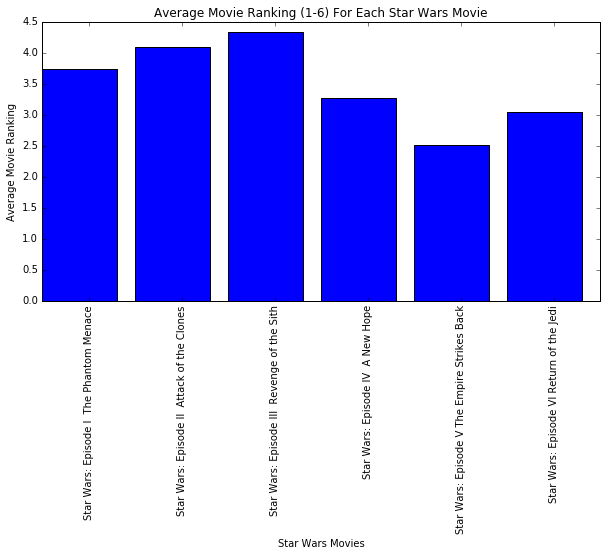

In [180]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean(axis=0)
rank_vals = list(mean_rankings)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(range(len(rank_vals)), rank_vals)

tick_vals = [(x+0.5) for x in range(6)]
ax.set_xlim([0,6])
ax.set_xticks(tick_vals)
ax.set_xticklabels(movies, rotation=90)
ax.set_xlabel("Star Wars Movies")
ax.set_ylabel("Average Movie Ranking")
ax.set_title("Average Movie Ranking (1-6) For Each Star Wars Movie")
plt.show()

**Discussion:** Up until now, we've been cleaning the data and making the table easier to read. This exercise is our first look at the contents. You can see from the bar chart of the average rankings that Empire Strikes Back is far-and-away the favorite movie of the bunch. The next two favorite films are the others from the original trilogy: A New Hope and Return of the Jedi. Revenge of the Sith is solidly last place.

**Part 7:** Finding the Most Seen Movie

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


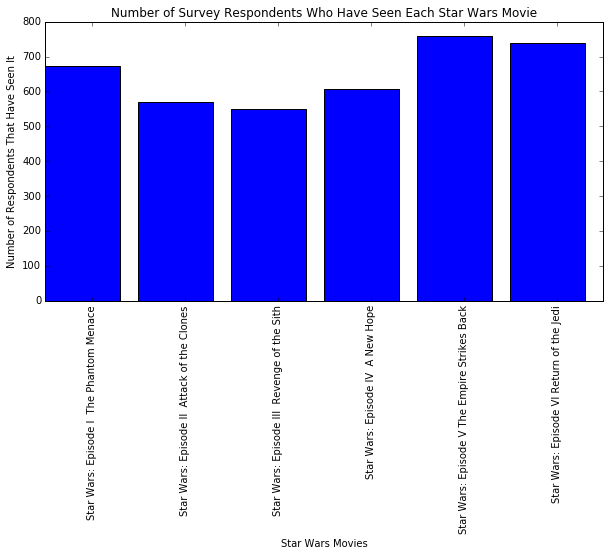

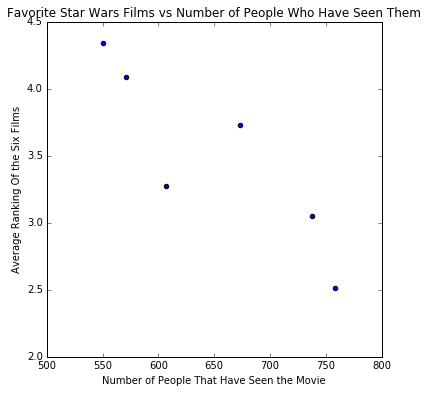

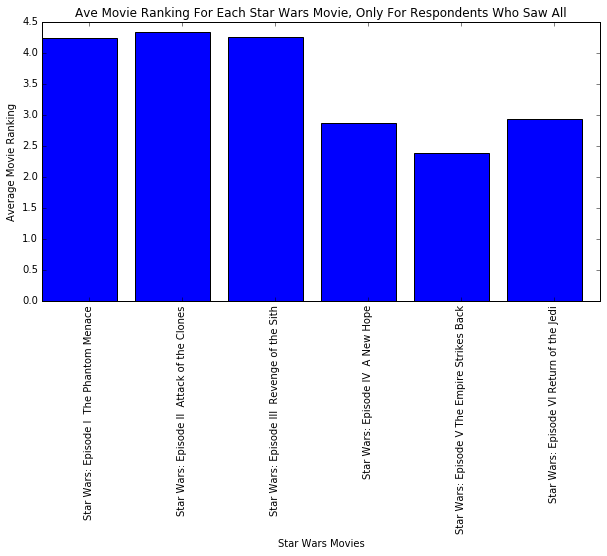

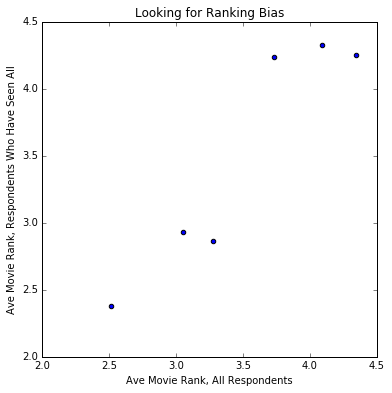

In [181]:
total_seen = star_wars[new].sum(axis=0)
print(total_seen)
seen_vals = list(total_seen)

# plotting the bar char for seen_vals
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(range(len(seen_vals)), seen_vals)

tick_vals = [(x+0.5) for x in range(6)]
ax.set_xlim([0,6])
ax.set_xticks(tick_vals)
ax.set_xticklabels(movies, rotation=90)
ax.set_xlabel("Star Wars Movies")
ax.set_ylabel("Number of Respondents That Have Seen It")
ax.set_title("Number of Survey Respondents Who Have Seen Each Star Wars Movie")
plt.show()

# plotting the scatter for seen_vals vs rank_vals
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=seen_vals,y=rank_vals)

ax.set_xlabel("Number of People That Have Seen the Movie")
ax.set_ylabel("Average Ranking Of the Six Films")
ax.set_title("Favorite Star Wars Films vs Number of People Who Have Seen Them")
plt.show()

# getting the rankings for films where the respondents saw all 6
saw_all_6 = (star_wars["seen_1"] == True) & (star_wars["seen_2"] == True) & \
(star_wars["seen_3"] == True) & (star_wars["seen_4"] == True) & \
(star_wars["seen_5"] == True) & (star_wars["seen_6"] == True)

ranks_if_saw_all = star_wars[star_wars.columns[9:15]].loc[saw_all_6]
mean_ranks_all = ranks_if_saw_all.mean(axis=0)
rank_vals_all = list(mean_ranks_all)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(range(len(rank_vals_all)), rank_vals_all)

ax.set_xlim([0,6])
ax.set_xticks(tick_vals)
ax.set_xticklabels(movies, rotation=90)
ax.set_xlabel("Star Wars Movies")
ax.set_ylabel("Average Movie Ranking")
ax.set_title("Ave Movie Ranking For Each Star Wars Movie, Only For Respondents Who Saw All")
plt.show()

# plotting filtered ranks vs unfiltered ranks
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=rank_vals,y=rank_vals_all)

ax.set_xlabel("Ave Movie Rank, All Respondents")
ax.set_ylabel("Ave Movie Rank, Respondents Who Have Seen All")
ax.set_title("Looking for Ranking Bias")
plt.show()

**Discussion:** There's a very strong relationship between the number of people in the survey who saw a Star Wars film and the ranking that film had. The effect is true even when we only consider respondents who saw all 6 films (removing the possibility that someone saw two bad films but still ranked them 1 and 2).

**Part 8:** Exploring the Data by Binary Segments

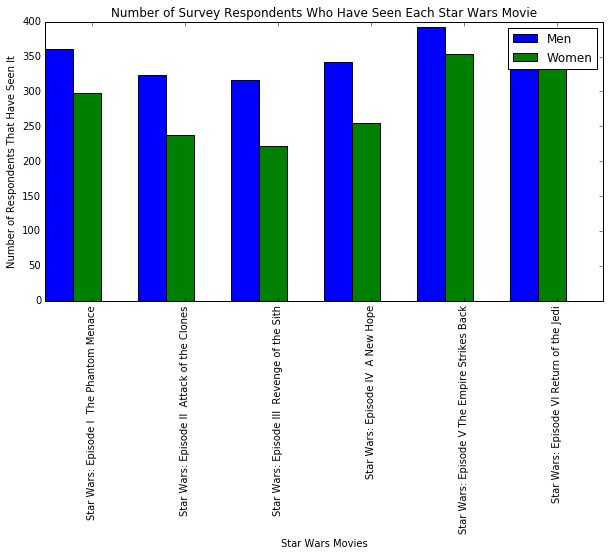

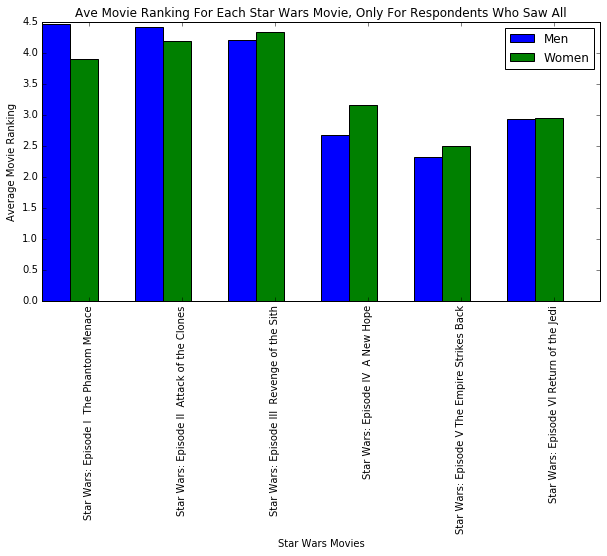

In [188]:
males = star_wars.loc[star_wars["Gender"] == "Male"]
females = star_wars.loc[star_wars["Gender"] == "Female"]

total_seen_males = males[new].sum(axis=0)
total_seen_females = females[new].sum(axis=0)
seen_male_vals = list(total_seen_males)
seen_female_vals = list(total_seen_females)

# plotting the bar char for seen_vals
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
width_val = 0.3
x_vals_male = [(x) for x in range(6)]
x_vals_female = [(x+width_val) for x in range(6)]
series1 = ax.bar(x_vals_male, seen_male_vals, width=width_val, color="blue")
series2 = ax.bar(x_vals_female, seen_female_vals, width=width_val, color="green")

tick_vals = [(x+0.5) for x in range(6)]
ax.set_xlim([0,6])
ax.set_xticks(tick_vals)
ax.set_xticklabels(movies, rotation=90)
ax.set_xlabel("Star Wars Movies")
ax.set_ylabel("Number of Respondents That Have Seen It")
ax.set_title("Number of Survey Respondents Who Have Seen Each Star Wars Movie")
ax.legend([series1[0], series2[0]], ('Men', 'Women'))
plt.show()

# getting the rankings for films where the respondents saw all 6
saw_all_6_males = (males["seen_1"] == True) & (males["seen_2"] == True) & \
(males["seen_3"] == True) & (males["seen_4"] == True) & \
(males["seen_5"] == True) & (males["seen_6"] == True)
saw_all_6_females = (females["seen_1"] == True) & (females["seen_2"] == True) & \
(females["seen_3"] == True) & (females["seen_4"] == True) & \
(females["seen_5"] == True) & (females["seen_6"] == True)

ranks_if_saw_all_males = males[males.columns[9:15]].loc[saw_all_6_males]
ranks_if_saw_all_females = females[females.columns[9:15]].loc[saw_all_6_females]
mean_ranks_all_males = ranks_if_saw_all_males.mean(axis=0)
mean_ranks_all_females = ranks_if_saw_all_females.mean(axis=0)
rank_vals_all_males = list(mean_ranks_all_males)
rank_vals_all_females = list(mean_ranks_all_females)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
series1 = ax.bar(x_vals_male, rank_vals_all_males, width=width_val, color="blue")
series2 = ax.bar(x_vals_female, rank_vals_all_females, width=width_val, color="green")

ax.set_xlim([0,6])
ax.set_xticks(tick_vals)
ax.set_xticklabels(movies, rotation=90)
ax.set_xlabel("Star Wars Movies")
ax.set_ylabel("Average Movie Ranking")
ax.set_title("Ave Movie Ranking For Each Star Wars Movie, Only For Respondents Who Saw All")
ax.legend([series1[0], series2[0]], ('Men', 'Women'))
plt.show()

**Discussion:** The patterns for the movies seen and the relative rankings of the films are consistent between men and women, suggesting that the strong correlation observed between the two variables - ranks and number who seem each film (previous section, scatterplot) - should hold true on an individual gender basis.

**Part 9:** Next Steps

Recommended additional work:
1. Segment the data by Education, Location, and "Which Character shot first?" and reconsider trends
2. Clean up and examine trends in favorite characters (columns 15:29)

I'm going to park this project now and perhaps revisit it in the future.